# NLP Visualizing Embeddings

In [1]:
# Implementing Dimensionality Reduction
# Reducing number of features while preserving important information
# - we have to reduce dimension from 100D to 2D
# - because we cannot visualize 100D
# This let us visually see:
# Similar words cluster together
# Opposite words separate
# Semantic relationships

In [3]:
'''
We can reduce Dimensions by using:
1. PCA - Linear Reduction
- PCA finds direction where date varies most
- Directions = Principal Components

Suppose students:
- height and weight are correlated
- Instead of 2 features - PCA create 1 new feature representing both

Steps of PCA:
1. Standardize data
2. Compute covariance matrix
3. Find eigenvectors
4. Select top components
5. Project data

# 2. t-SNE - Non linear
t-Distributed Stochastic Neighbor Embedding
Preserves local structure (neighbors)
Points close in high dim -> close in low dim

Steps of t-SNE
1. It converts distance -> probabilities
2. Then tries to match them in low dimension
3. Then uses KL divergence

# 3. UMAP - Uniform Manifold Approximation & Projection
- Modern alternative of t-sne
'''

'\nWe can reduce Dimensions by using:\n1. PCA - Linear Reduction\n- PCA finds direction where date varies most\n- Directions = Principal Components\n\nSuppose students:\n- height and weight are correlated\n- Instead of 2 features - PCA create 1 new feature representing both\n\nSteps of PCA:\n1. Standardize data\n2. Compute covariance matrix\n3. Find eigenvectors\n4. Select top components\n5. Project data\n\n# 2. t-SNE - Non linear\nt-Distributed Stochastic Neighbor Embedding\nPreserves local structure (neighbors)\nPoints close in high dim -> close in low dim\n\nSteps of t-SNE\n1. It converts distance -> probabilities\n2. Then tries to match them in low dimension\n3. Then uses KL divergence\n\n# 3. UMAP - Uniform Manifold Approximation & Projection\n- Modern alternative of t-sne\n'

In [4]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
model = api.load("glove-wiki-gigaword-100")
print("Model loaded successfully...")

Model loaded successfully...


In [7]:
words = [
    "king","queen","man","woman",
    "dog","cat","animal",
    "car","truck","vehicle",
    "happy","sad","joy","anger"
]

vectors = [model[word] for word in words]

In [11]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

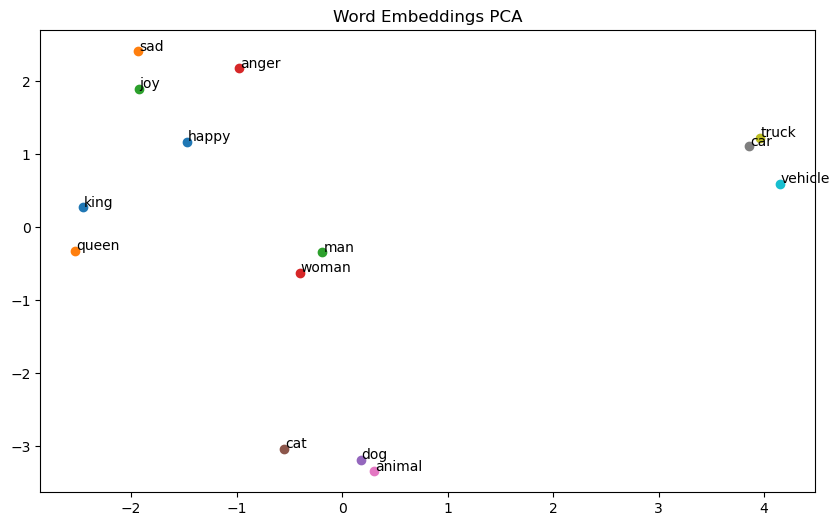

In [12]:
plt.figure(figsize=(10,6))
for i, word in enumerate(words):
    x = reduced[i][0]
    y = reduced[i][1]
    plt.scatter(x,y)
    plt.text(x + 0.01, y + 0.01, word)
plt.title("Word Embeddings PCA")
plt.show()
    

In [15]:
# Using T-SNE
from sklearn.manifold import TSNE
import numpy as np

In [21]:
vectors = np.array([model[word] for word in words])

In [24]:
# perplexity - how many neighbors each point considers
tsne = TSNE(n_components=2, perplexity=3)
reduced = tsne.fit_transform(vectors)

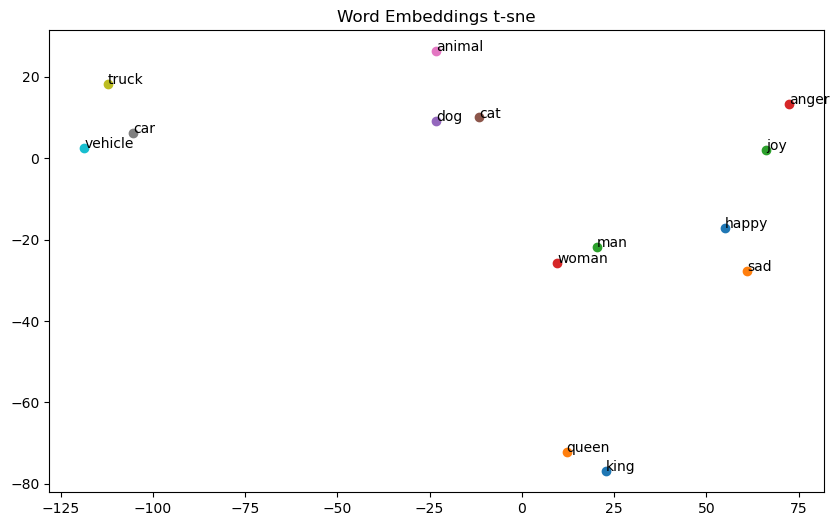

In [26]:
plt.figure(figsize=(10,6))
for i, word in enumerate(words):
    x = reduced[i][0]
    y = reduced[i][1]
    plt.scatter(x,y)
    plt.text(x + 0.01, y + 0.01, word)
plt.title("Word Embeddings t-sne")
plt.show()
    